## Caída con Restitución 

Integrantes
- Sandra Arce Mena

- Angela María Cubillos Garay

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim

In [2]:
class Particle():
    
    # init

    def __init__(self,r0,v0,a0,t,m,radius,Id):

        self.dt = t[1]-t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0

        self.rVector = np.zeros((len(t),len(r0)))
        self.vVector = np.zeros((len(t),len(v0)))
        self.aVector = np.zeros((len(t),len(a0)))

        self.m = m
        self.radius = radius
        self.Id = Id

    # Method
    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        

        # Euler method
        self.r += self.v*self.dt
        self.v += self.a*self.dt
        

    def CheckWallLimits(self,limits,dim,var):

        for i in range(dim):
            
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = -var*self.v[i]
                
            if self.r[i] - self.radius < -limits[i]:
                self.v[i] = -var*self.v[i]
                
    # Setters
    def SetPosition(self,i,r):
        self.rVector[i] = r

    def SetVelocity(self,i,v):
        self.vVector[i] = v

    #Getters

    def GetPositionVector(self):
        return self.rVector

    def GetRPositionVector(self):
        return self.RrVector

    def GetVelocityVector(self):
        return self.vVector

    def GetRVelocityVector(self):
        return self.RvVector

    def GetR(self):
        return self.radius
    
    def GetMass(self):
        return self.m
    
    def ReduceSize(self,factor):

        self.RrVector = np.array([self.rVector[0]])
        self.RvVector = np.array([self.vVector[0]])

        for i in range(1,len(self.rVector)):

            if i%factor == 0:

                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])

In [3]:
dt = 0.01
tmax = 30
t = np.arange(0,tmax+dt,dt)

In [4]:
def RunSimulationfirst(t,P,Limits):
    
    for it in tqdm(range(len(t))):
        
        P.CheckWallLimits(Limits,2,0.9)
        P.Evolution(it)
        
    return P

In [5]:
r0 = np.array([-15.,5.])
v0 = np.array([1.,0.])
a0 = np.array([0.,-9.8])

In [6]:
Limits = np.array([20,20])

In [7]:
P = Particle(r0,v0,a0,t,1,1,1)

In [8]:
P = RunSimulationfirst(t,P,Limits)

100%|██████████| 3001/3001 [00:00<00:00, 66968.72it/s]


In [9]:
def ReduceTime(t,factor):
    
    P.ReduceSize(factor)
    
    Newt = []
    
    for i in range(len(t)):
        
        if i%factor == 0:
            
            Newt.append(t[i])
            
    return np.array(Newt)

redt = ReduceTime(t,10)

<IPython.core.display.Javascript object>


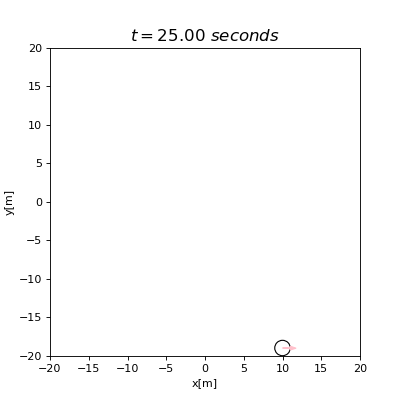

In [10]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():
    
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
        
    x = P.GetRPositionVector()[i,0]
    y = P.GetRPositionVector()[i,1]

    vx = P.GetRVelocityVector()[i,0]
    vy = P.GetRVelocityVector()[i,1]

    circle = plt.Circle((x,y), P.GetR(), color = "k", fill = False, label="Bola")
    plot = ax.add_patch(circle)
    plt.legend()
    ax.set_xlabel('x[m]')
    ax.set_ylabel('y[m]')
    plot = ax.arrow(x,y,vx,vy,color = "pink", head_width=0.5)

    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init(), interval=1)


plt.show()

<IPython.core.display.Javascript object>


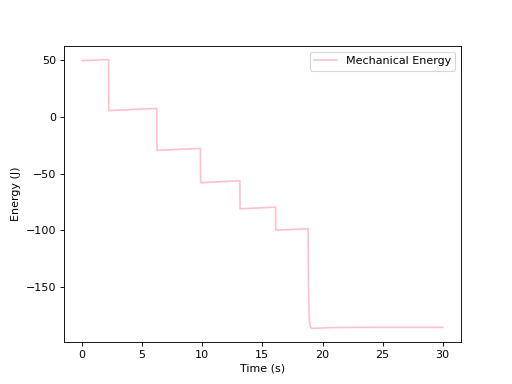

In [11]:
def Mechanical_energy(p,t):
    
    distance = p.GetPositionVector()
    velocity = p.GetVelocityVector()
    mass = p.GetMass()
      
    Mechanical_energy = []
    
    for v in range(len(velocity)): 
        
        Potential_energy = (distance[v][1])*9.8*mass 
        Kinetic_energy = (1/2)*mass*(velocity[v][0]**2 + velocity[v][1]**2)           
        
        Mechanical_energy.append(Potential_energy + Kinetic_energy)
        
    plt.figure()           
    plt.xlabel('Time (s)')
    plt.ylabel('Energy (J)')
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])
    plt.plot(t,Mechanical_energy,label='Mechanical Energy', color = 'pink')
    plt.legend()
    plt.show()

Mechanical_energy(P,t)

In [12]:
#Punto 2, Gas

dt = 0.01
tmax = 30
t = np.arange(0,tmax+dt,dt)

In [13]:
def GetParticles(NParticles,Limit,Velo=50,Dim=3,dt=0.01):
    
    Particles = []
    
    for i in range(NParticles):
        
        r0 = np.random.uniform(-Limit+1.0,Limit-1.0,size=Dim)
        v0 = np.random.uniform(-Velo,Velo,size=Dim)
        a0 = np.zeros(Dim)
        
        P = Particle(r0,v0,a0,t,1.,1.,i)
        
        Particles.append(P)
        
    return Particles

In [14]:
limits = np.array([10.,10.,10.])

In [15]:
def RunSimulationSecond(t, NParticles=100, Velo=6):
    
    Particles = GetParticles(NParticles,limits[0],Velo)
    
    for it in tqdm(range(len(t))):
        
        for i in range(len(Particles)):
            
            Particles[i].CheckWallLimits(limits,3,1.)
            Particles[i].Evolution(it)
            
    return Particles

In [16]:
Particles_ = RunSimulationSecond(t, Velo=6)

100%|██████████| 3001/3001 [00:04<00:00, 711.16it/s]


In [17]:
def ReduceTimeSecond(t,factor):
    
    for p in (Particles_):
        
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        
        if i%factor == 0:
            
            Newt.append(t[i])
            
    return np.array(Newt)

In [18]:
redt = ReduceTimeSecond(t,10)

<IPython.core.display.Javascript object>


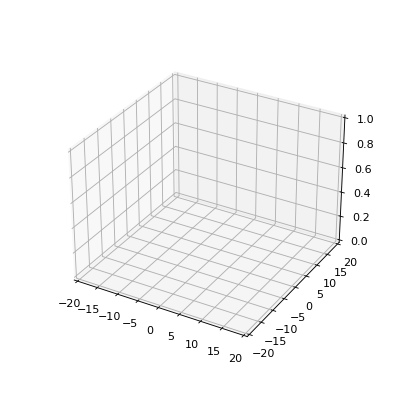

In [19]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection="3d")


def init():
    
    ax.set_xlim3d(-Limits[0],Limits[0])
    ax.set_ylim3d(-Limits[1],Limits[1])
    ax.set_zlim3d(-Limits[2],Limits[2])

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
    ax.set_xlabel("x[m]")   
    ax.set_ylabel("y[m]")
    ax.set_zlabel("z[m]")
    
    for p in Particles_:
        
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
        z = p.GetRPositionVector()[i,2]

        plot = ax.scatter(x,y,z,color="k")
        
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)
